In [ ]:
#Import library dan data
import pandas as pd
import numpy as np

df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

df_train = df_train_raw.copy()
df_test = df_test_raw.copy()

print(df_train.shape)
print(df_test.shape)

(1500, 22)
(500, 21)


In [ ]:
#Mempelajari data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               500 non-null    int64  
 1   daya_baterai        500 non-null    int64  
 2   bluetooth           500 non-null    int64  
 3   kecepatan_clock     500 non-null    float64
 4   dual_sim            500 non-null    int64  
 5   kamera_depan        500 non-null    int64  
 6   four_g              500 non-null    object 
 7   memori_internal     500 non-null    int64  
 8   tebal_hp            500 non-null    float64
 9   berat_hp            500 non-null    int64  
 10  jumlah_prosesor     500 non-null    int64  
 11  kamera_belakang_mp  500 non-null    int64  
 12  px_panjang          500 non-null    int64  
 13  px_lebar            500 non-null    int64  
 14  kapasitas_ram       500 non-null    int64  
 15  panjang_layar       500 non-null    int64  
 16  lebar_la

In [ ]:
#Menghitung berapa index di setiap kelompok
df_train['price_range'].value_counts()

1000k-<2000k    390
0-<1000k        376
2000k-3000k     375
>3000k          359
Name: price_range, dtype: int64

In [ ]:
#Memeriksa data apakah ada missing value
def miss_val(df):
    for col in df.columns.tolist():
        print('Missing value in {} column : {}'.format(col,df[col].isnull().sum()))
    print('\n')

In [ ]:
miss_val(df_train)

Missing value in index column : 0
Missing value in daya_baterai column : 0
Missing value in bluetooth column : 0
Missing value in kecepatan_clock column : 50
Missing value in dual_sim column : 0
Missing value in kamera_depan column : 0
Missing value in four_g column : 0
Missing value in memori_internal column : 0
Missing value in tebal_hp column : 0
Missing value in berat_hp column : 0
Missing value in jumlah_prosesor column : 0
Missing value in kamera_belakang_mp column : 0
Missing value in px_panjang column : 0
Missing value in px_lebar column : 0
Missing value in kapasitas_ram column : 0
Missing value in panjang_layar column : 119
Missing value in lebar_layar column : 0
Missing value in waktu_telfon column : 0
Missing value in three_g column : 0
Missing value in touch_screen column : 0
Missing value in wifi column : 0
Missing value in price_range column : 0




In [ ]:
miss_val(df_test)

Missing value in index column : 0
Missing value in daya_baterai column : 0
Missing value in bluetooth column : 0
Missing value in kecepatan_clock column : 0
Missing value in dual_sim column : 0
Missing value in kamera_depan column : 0
Missing value in four_g column : 0
Missing value in memori_internal column : 0
Missing value in tebal_hp column : 0
Missing value in berat_hp column : 0
Missing value in jumlah_prosesor column : 0
Missing value in kamera_belakang_mp column : 0
Missing value in px_panjang column : 0
Missing value in px_lebar column : 0
Missing value in kapasitas_ram column : 0
Missing value in panjang_layar column : 0
Missing value in lebar_layar column : 0
Missing value in waktu_telfon column : 0
Missing value in three_g column : 0
Missing value in touch_screen column : 0
Missing value in wifi column : 0




In [ ]:
#Melakukan replacing/data filling pada missing value
df_train['kecepatan_clock'] = df_train['kecepatan_clock'].fillna(df_train['kecepatan_clock'].mean())
print(df_train['kecepatan_clock'].isnull().sum())

0


In [ ]:
df_train['panjang_layar'] = df_train['panjang_layar'].fillna(df_train['panjang_layar'].mean())
print(df_train['panjang_layar'].isnull().sum())

0


In [ ]:
#Encoding data menjadi biner
four_g_dict = {'Tidak' : 0, 'Ya' : 1}

df_train['four_g'] = df_train['four_g'].replace(four_g_dict)

df_test['four_g'] = df_test['four_g'].replace(four_g_dict)

In [ ]:
df_train['price_range'].value_counts()

1000k-<2000k    390
0-<1000k        376
2000k-3000k     375
>3000k          359
Name: price_range, dtype: int64

In [ ]:
#mengubah price range menjadi kelompok
price_range_dict = {'0-<1000k' : 0,
                    '1000k-<2000k' : 1,
                    '2000k-3000k' : 2,
                    '>3000k' : 3
                   }
                    
df_train['price_range'] = df_train['price_range'].replace(price_range_dict)

df_train['price_range'].value_counts()

1    390
0    376
2    375
3    359
Name: price_range, dtype: int64

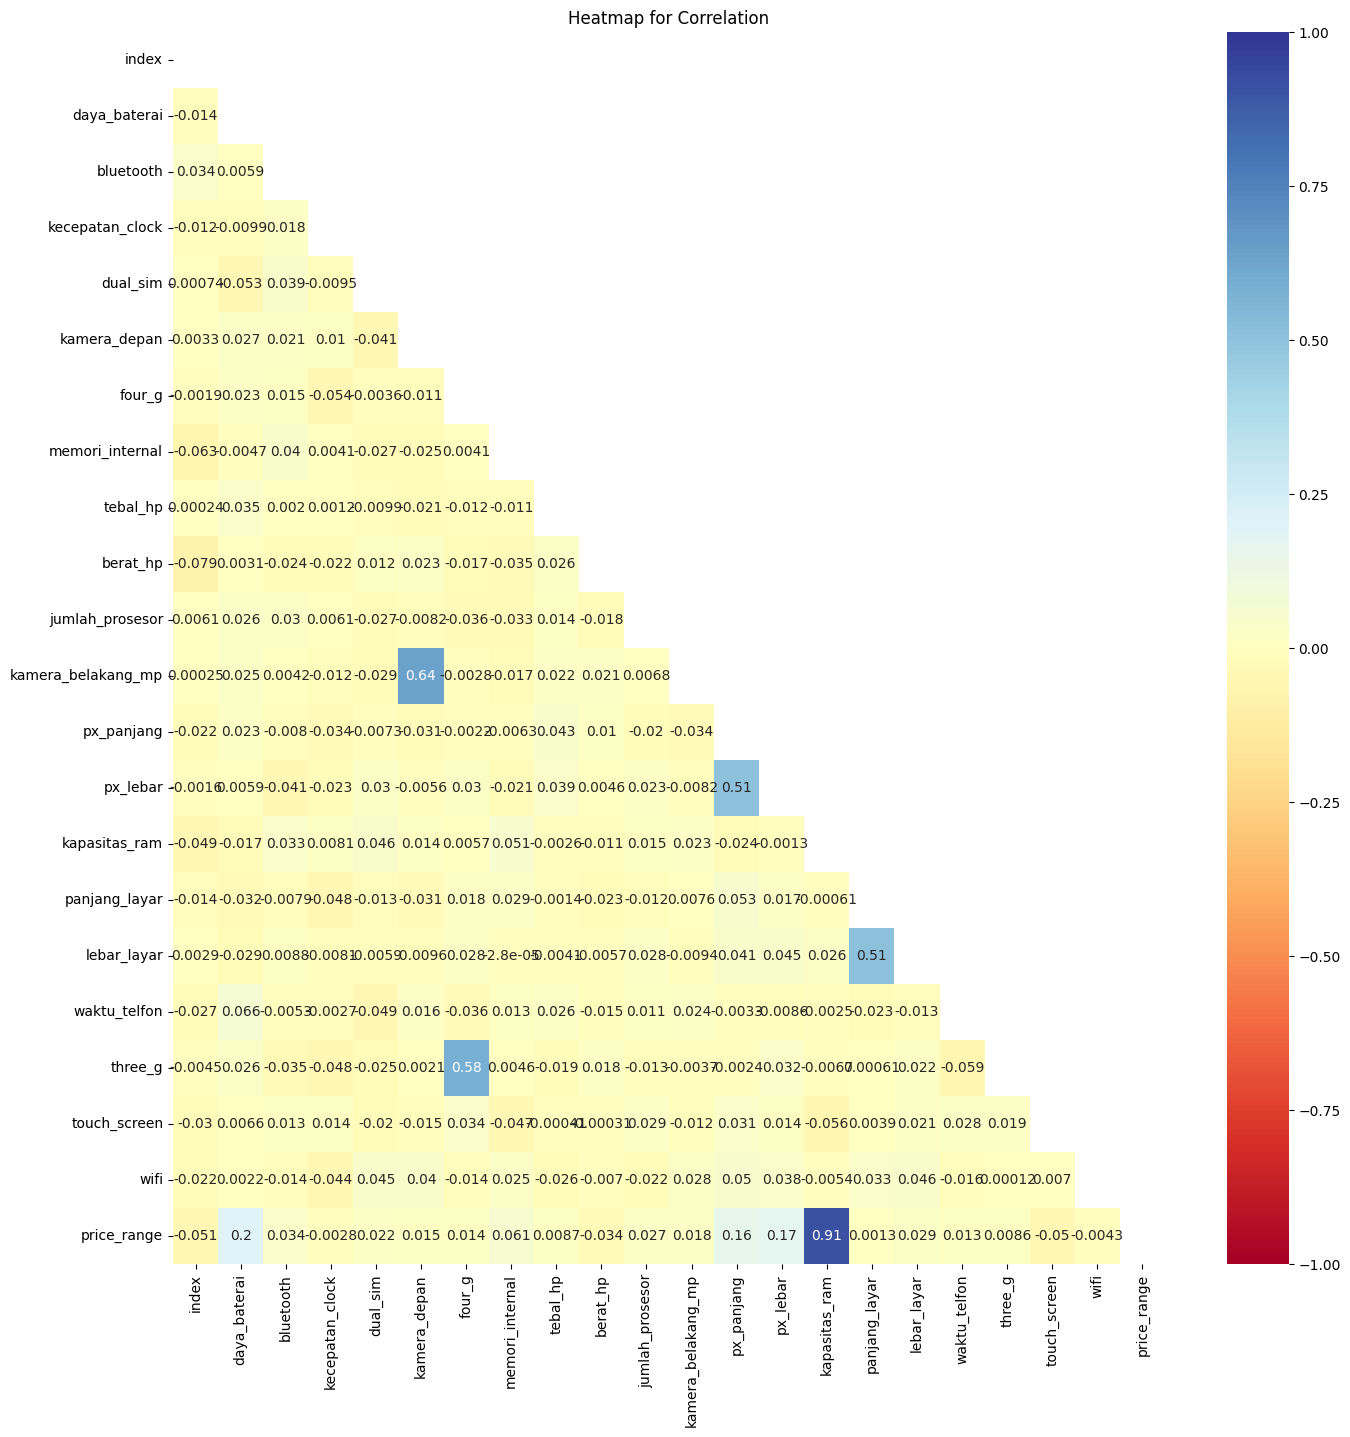

In [ ]:
#untuk melihat korelasi
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,16))
mask = np.triu(np.ones_like(df_train.corr())) 
sns.heatmap(df_train.corr(),vmin=-1,vmax=1, mask=mask, annot = True, cmap="RdYlBu")
plt.title('Heatmap for Correlation')
plt.show()

In [ ]:
#Membuat variabel untuk train an validasi
x = df_train.drop('price_range', axis = 1).drop('index', axis = 1)
y = df_train['price_range']

x_test = df_test.drop('index', axis = 1).copy()
x_test

,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
2,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
3,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
4,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,805,0,0.8,0,1,0,34,0.6,88,6,2,1262,1538,3647,18,11,9,1,0,1
496,1162,0,1.0,0,0,0,50,0.5,104,4,10,332,866,1404,10,3,15,1,1,1
497,1759,1,1.4,0,10,1,15,0.4,101,4,13,382,1163,2107,18,5,16,1,1,0
498,514,1,1.6,0,7,1,37,0.1,172,1,9,956,1723,3392,12,8,5,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(1200, 20)
(1200,)
(300, 20)
(300,)


In [ ]:
#Algoritma Random Forest Classifier & fungsi GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

In [ ]:
#Mmebuat parameter untuk cross validation
params = {'n_estimators' : np.arange(100,200,10),
          'criterion' : ['gini','entropy'],
          'max_features' : ['log2']          
         }

In [ ]:
scoring = make_scorer(f1_score, average = ('micro'))
gscv_rfc = GridSearchCV(rfc, params, scoring = scoring , cv= 10)
gscv_rfc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2'],
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
             scoring=make_scorer(f1_score, average=micro))

In [ ]:
#Mengambil hyperarameter
print(gscv_rfc.best_params_)
print(gscv_rfc.best_score_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 180}
0.8724999999999999


In [ ]:
#Mmebuat model dengan tuning hyperparameter
model_rfc = RandomForestClassifier(n_estimators = 180, criterion = 'entropy', max_features = 'log2')
train_rfc = model_rfc.fit(x_train, y_train)

y_pred_rfc =  model_rfc.predict(x_valid)

In [ ]:
f1_score_rfc_micro = f1_score(y_valid, y_pred_rfc, average = 'micro')
print(f1_score_rfc_micro)

f1_score_rfc_macro = f1_score(y_valid, y_pred_rfc, average = 'macro')
print(f1_score_rfc_macro)

f1_score_rfc_weighted = f1_score(y_valid, y_pred_rfc, average = 'weighted')
print(f1_score_rfc_weighted)

acc_rfc = accuracy_score(y_valid, y_pred_rfc)
print(acc_rfc)

cf_rfc = confusion_matrix(y_valid, y_pred_rfc)
print(cf_rfc)

0.91
0.9109794037124476
0.910236081993516
0.91
[[66  9  0  0]
 [ 2 72  4  0]
 [ 0  5 65  5]
 [ 0  0  2 70]]


In [ ]:
#Algoritma KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
params_knn = {'n_neighbors' : np.arange(90, 200,10), 
          'weights' : ['uniform', 'distance'], 
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],  
          }

In [ ]:
gscv_knn = GridSearchCV(knn, params_knn, cv = 10)
gscv_knn.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]),
                         'weights': ['uniform', 'distance']})

In [ ]:
print(gscv_knn.best_params_)
print(gscv_knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 110, 'weights': 'distance'}
0.9116666666666667


In [ ]:
model_knn = KNeighborsClassifier(algorithm =  'auto', n_neighbors = 90, weights = 'distance')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=90, weights='distance')

y_pred_knn =  model_knn.predict(x_valid)

In [ ]:
f1_score_knn_micro = f1_score(y_valid, y_pred_knn, average = 'micro')
print(f1_score_knn_micro)

f1_score_knn_macro = f1_score(y_valid, y_pred_knn, average = 'macro')
print(f1_score_knn_macro)

f1_score_knn_weighted = f1_score(y_valid, y_pred_knn, average = 'weighted')
print(f1_score_knn_weighted)

acc_knn = accuracy_score(y_valid, y_pred_knn)
print(acc_knn)

cf_knn = confusion_matrix(y_valid, y_pred_knn)
print(cf_knn)

0.9466666666666667
0.9469965070127521
0.9469194589737638
0.9466666666666667
[[73  2  0  0]
 [ 2 73  3  0]
 [ 0  2 72  1]
 [ 0  0  6 66]]


In [ ]:
#Algoritma Naive Bayes
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, accuracy_score

svc = SVC()

In [ ]:
scoring = make_scorer(f1_score, average = ('micro'))

params_NB = {'C' : [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
             'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
             'kernel': ['rbf','linear']
            }

In [ ]:
gscv_NB = GridSearchCV(svc, params_NB, scoring = scoring, cv = 10)

gscv_NB.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'kernel': ['rbf', 'linear']},
             scoring=make_scorer(f1_score, average=micro))

In [ ]:
print(gscv_NB.best_params_)
print(gscv_NB.best_score_)

{'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'}
0.9783333333333333


In [ ]:
model_NB = SVC(C = 0.05, gamma = 0.1, kernel = 'linear')
model_NB.fit(x_train, y_train)

SVC(C=0.05, gamma=0.1, kernel='linear')

y_pred_NB =  model_NB.predict(x_valid)

In [ ]:
f1_score_NB_micro = f1_score(y_valid, y_pred_NB, average = 'micro')
print(f1_score_NB_micro)

f1_score_NB_macro = f1_score(y_valid, y_pred_NB, average = 'macro')
print(f1_score_NB_macro)

f1_score_NB_weighted = f1_score(y_valid, y_pred_NB, average = 'weighted')
print(f1_score_NB_weighted)

acc_NB = accuracy_score(y_valid, y_pred_NB)
print(acc_NB)

cf_NB = confusion_matrix(y_valid, y_pred_NB)
print(cf_NB)

0.97
0.9701594415216706
0.9699744948893556
0.97
[[75  0  0  0]
 [ 2 73  3  0]
 [ 0  1 73  1]
 [ 0  0  2 70]]


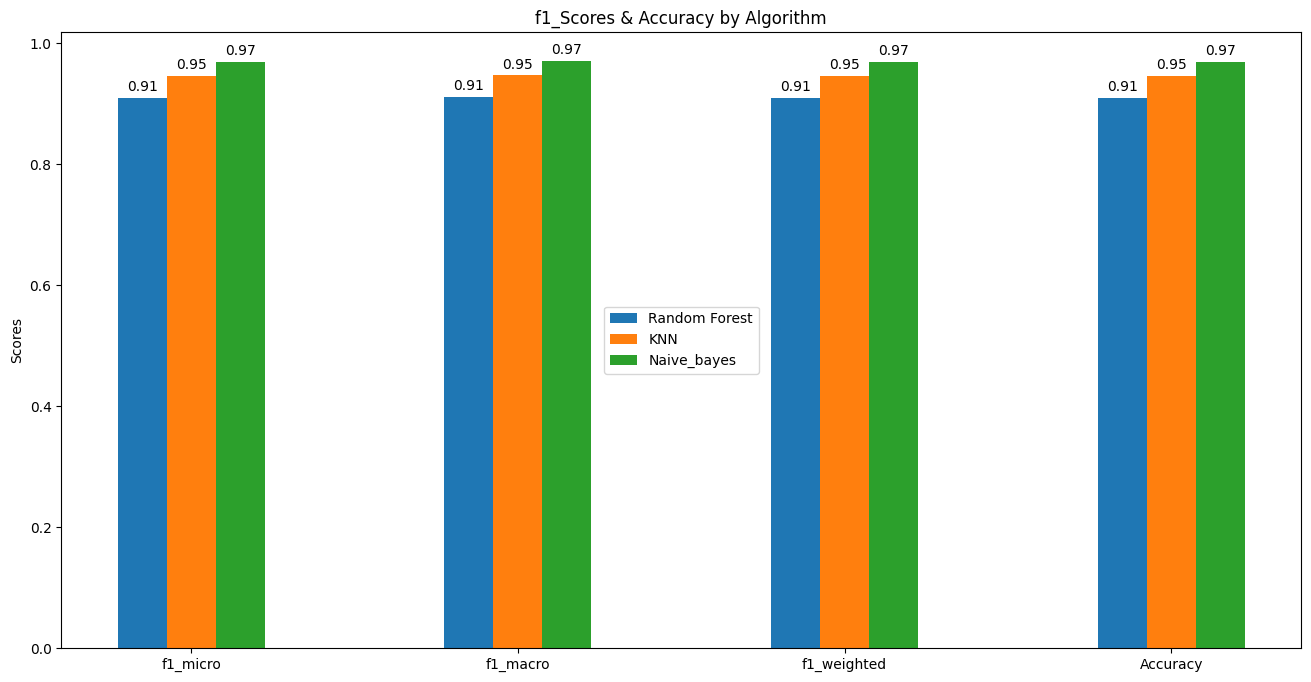

In [ ]:
#Mmebandingkan hasil ketiganya
import matplotlib.pyplot as plt

labels = ['f1_micro','f1_macro','f1_weighted', 'Accuracy']
random_forest = [f1_score_rfc_micro, f1_score_rfc_macro, f1_score_rfc_weighted, acc_rfc]
knn = [f1_score_knn_micro, f1_score_knn_macro, f1_score_knn_weighted, acc_knn]
naive_bayes = [f1_score_NB_micro, f1_score_NB_macro, f1_score_NB_weighted, acc_NB]

x = 2*np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - width, random_forest, width, label='Random Forest')
rects2 = ax.bar(x , knn, width, label='KNN')
rects3 = ax.bar(x + width, naive_bayes, width, label='Naive_bayes')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
  
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
ax.set_ylabel('Scores')
ax.set_title('f1_Scores & Accuracy by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.show()

In [ ]:
#Mmeprediksi data test dengan Naives Bayes
price_range_pred_NB = model_NB.predict(x_test)
price_range_pred_NB

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 1, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [ ]:
df_test['price_range'] = price_range_pred_NB
df_test

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,...,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,405,1454,1,0.5,1,1,0,34,0.7,83,...,250,1033,3419,7,5,5,1,1,0,3
1,1190,1092,1,0.5,1,10,0,11,0.5,167,...,468,571,737,14,4,11,0,1,0,0
2,1132,1524,1,1.8,1,0,0,10,0.6,174,...,154,550,2678,16,5,13,1,0,1,2
3,731,1807,1,2.1,0,2,0,49,0.8,125,...,337,1384,1906,17,13,13,0,1,1,2
4,1754,1086,1,1.7,1,0,1,43,0.2,111,...,56,1150,3285,11,5,17,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,936,805,0,0.8,0,1,0,34,0.6,88,...,1262,1538,3647,18,11,9,1,0,1,3
496,1524,1162,0,1.0,0,0,0,50,0.5,104,...,332,866,1404,10,3,15,1,1,1,0
497,1415,1759,1,1.4,0,10,1,15,0.4,101,...,382,1163,2107,18,5,16,1,1,0,2
498,1223,514,1,1.6,0,7,1,37,0.1,172,...,956,1723,3392,12,8,5,1,1,1,3


In [ ]:
result_NB = df_test[['index','price_range']].astype(int)
result_NB

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2
...,...,...
495,936,3
496,1524,0
497,1415,2
498,1223,3


In [ ]:
#Simpan kedlaam file .csv baru
result_NB.to_csv('hasil_prediksi_terbaik.csv', index = False)

In [ ]:
format_check = pd.read_csv('hasil_prediksi_terbaik.csv')
format_check.head()

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2
